# Hypothesis - Device Activity

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample

**Read Data**

In [9]:
# read train_X and train_y from /data/processed/
train_X = pd.read_csv('../data/processed/X_train.csv')
train_y = pd.read_csv('../data/processed/y_train.csv')

# combine into data
data = pd.concat([train_y, train_X], axis=1)

# check shape and head
print(f'data shape: {data.shape}')
data.head()

data shape: (52776, 31)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.9,0.383245,28,26,30,0.017751,-1.00000,AB,1125,...,11,0,200.0,0,INTERNET,20.301149,macintosh,0,1,2
1,0,0.8,0.717703,-1,63,40,0.011542,52.68933,AA,791,...,20,0,200.0,0,INTERNET,4.309454,other,1,1,2
2,0,0.3,0.517523,-1,78,20,0.008581,-1.00000,AB,1844,...,1,1,1500.0,0,INTERNET,4.491135,other,0,1,0
3,0,0.9,0.358260,-1,45,40,0.016844,-1.00000,AC,1150,...,-1,0,500.0,0,INTERNET,1.507028,windows,1,2,2
4,0,0.8,0.183328,11,92,20,0.015774,-1.00000,AD,525,...,1,0,500.0,0,INTERNET,2.000494,linux,1,1,1


## Feature Engineering

In [10]:
import importlib.util

abs_filepath = '/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py'

# Replace '/absolute/path/to/your/module/module_name.py' with the actual absolute file path
spec = importlib.util.spec_from_file_location("feature_eng_hyp_device_activity", abs_filepath)
your_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(your_module)

In [11]:
data_generated = your_module.generateDeviceActivityFeatures(data)

# check shape and head
print(f'data_generated shape: {data_generated.shape}')
data_generated.head()

/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group05 = data[~data.index.isin(group01.index) & ~data.index.isin(group02.index) & ~data.index.isin(group03.index) & ~data.index.isin(group04.index)]
/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group05 = data[~data.index.i

Feature 1 created.
Feature 1 created.
Feature 3 created.
Feature 4 created.
Feature 5 created.
Features for Device Activity Hypothesis generated.
data_generated shape: (52776, 36)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,FE_01_device_os_emails_prob,FE_02_keep_alive_device_emails_prob,FE_03_source_foreign_request_prob,FE_04_device_os_foreign_request_prob,FE_05_device_os_prob
128,0,0.5,0.549786,-1,50,40,27.293091,-1.000000,AC,1298,...,4.508612,windows,0,0,1,0.6047,0.352,0.1627,0.3027,0.3083
1422,1,0.7,0.174847,-1,61,70,0.003595,9.522029,AB,1486,...,3.560275,windows,0,0,2,0.6047,0.352,0.1627,0.3027,0.3083
1572,0,0.8,0.849118,-1,202,40,0.010027,-1.000000,AC,3229,...,3.535784,windows,0,0,1,0.6047,0.352,0.1627,0.3027,0.3083
2380,0,0.7,0.366895,-1,300,50,0.017651,41.225517,AA,3009,...,6.786212,windows,0,0,3,0.6047,0.352,0.1627,0.3027,0.3083
2739,1,0.7,0.359558,-1,65,40,0.011045,-1.000000,AC,673,...,6.204049,windows,0,0,5,0.6047,0.352,0.1627,0.3027,0.3083


## EDA Bank Activity and Device Activity

**Hypothesis: Fraudulent Bank Accounts have unique characteristics in relation to how their device activity.**
* More likely to use a phone that has more lax security i.e. windows
* More likely to have more than 1 email in each device. --> more emails to create more fake accounts
* If a phone has more than 1 email from each device, then it keep_alive_session likely to be false (i.e. value=0) --> convienience on fraudster's end. troublesome to log in and out continually.
* Session length will also be short??

**Columns considered**

* Device Activity:
    * `session_length_in_minutes`
    * `device_os`
    * `keep_alive_session`
    * `device_distinct_emails_8w`
    * `source`
    * `foreign_request`

**Explanation of Columns**

| Column Name | Description | Link to Fraud |
|:------------|:------------|:--------------|
| device_distinct_emails_8w | No. of distinct emails in banking website from the used device in last 8 weeks. <br> Simply put, if I use my email address to log into the banking website, <br> then I effectively used 1 distinct email address. <br>If I leave the phone unattended for 8 weeks, then this value becomes 0 due to inactivity for 8 weeks. | Spare phones are commonly used to prevent banking companies from tracking them. <br> Thus, able to explain the inactivity. When the phone is actually used, <br>the fraudsters are likely to use more than 2 distinct email address for 2 accounts using the same phone.


In [14]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

# change all columns to cateogrical except for session_length_in_minutes
device_activity_df['device_os'] = device_activity_df['device_os'].astype('category')
device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype('category')
device_activity_df['source'] = device_activity_df['source'].astype('category')
device_activity_df['foreign_request'] = device_activity_df['foreign_request'].astype('category')
device_activity_df['fraud_bool'] = device_activity_df['fraud_bool'].astype('category')
device_activity_df['device_distinct_emails_8w'] = device_activity_df['device_distinct_emails_8w'].astype('category')

# print shape
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 7)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_74565/1562498968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['device_os'] = device_activity_df['device_os'].astype('category')
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_74565/1562498968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype('category')
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_74565/156

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request
0,0,20.301149,macintosh,0,1,INTERNET,0
1,0,4.309454,other,1,1,INTERNET,0
2,0,4.491135,other,0,1,INTERNET,0
3,0,1.507028,windows,1,2,INTERNET,0
4,0,2.000494,linux,1,1,INTERNET,0


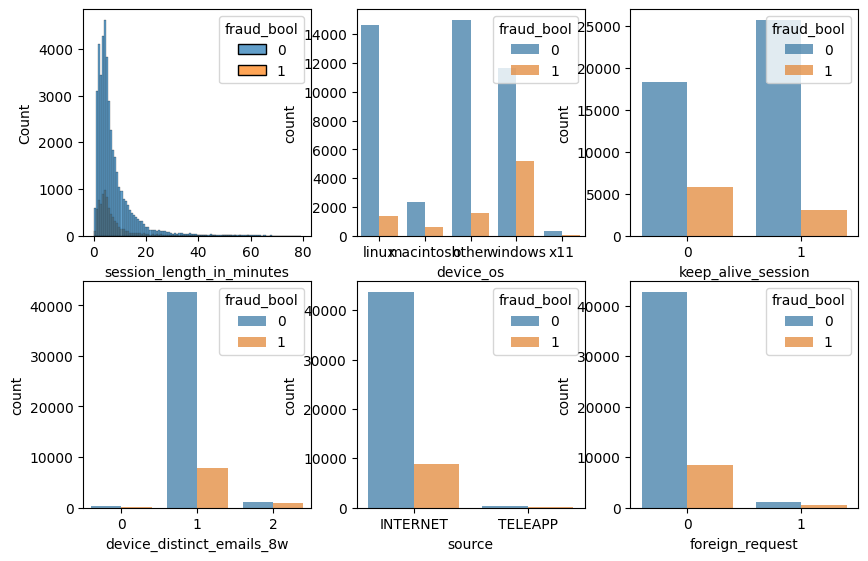

In [15]:
# for each column, if it is categorical, plot the value counts, if it is numerical, plot histogram
# put in a 3 x 3 grid, and color code the fraud_bool column
# print all except the first column
plt.figure(figsize=(10, 10))
for i, col in enumerate(device_activity_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    if device_activity_df[col].dtype.name == 'category':
        sns.countplot(data=device_activity_df, x=col, hue='fraud_bool', alpha=0.7)
    else:
        sns.histplot(data=device_activity_df, x=col, hue='fraud_bool', bins=100, alpha=0.7)

* `device_os`, `keep_alive_session`, `device_distinct_emails_8w`, `source`, `foreign_request` all does not have a similar ratio.
* Undersampled ratio is 1:5, thus, if a categorical column does not influence whether or not the bank application is fraud, then we would expect the ratio to be also 1:5. Thus, any deviation from this is a sign there might be some form of fraud pattern that we can leverage on.

/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_74565/197303234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['device_distinct_emails_8w'] = device_activity_df['device_distinct_emails_8w'].astype('category')


                 column_name   category     fraud  non_fraud
0                  device_os  macintosh  0.201498   0.798502
0                  device_os      other  0.095143   0.904857
0                  device_os    windows  0.307911   0.692089
0                  device_os      linux  0.086747   0.913253
0                  device_os        x11  0.168766   0.831234
0         keep_alive_session          0  0.240405   0.759595
0         keep_alive_session          1  0.105493   0.894507
0                     source   INTERNET  0.166663   0.833337
0                     source    TELEAPP  0.241158   0.758842
0            foreign_request          0  0.163607   0.836393
0            foreign_request          1  0.277264   0.722736
0  device_distinct_emails_8w          1  0.155773   0.844227
0  device_distinct_emails_8w          2  0.439457   0.560543
0  device_distinct_emails_8w          0  0.323077   0.676923


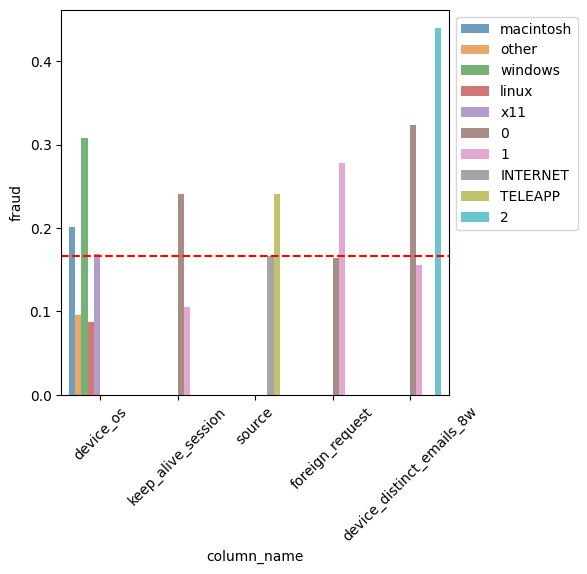

In [17]:
# chance device_distinct_emails_8w to category
device_activity_df['device_distinct_emails_8w'] = device_activity_df['device_distinct_emails_8w'].astype('category')

# check proportion of fraud vs non-fraud within each category
categorical_columns = ['fraud_bool', 'device_os', 'keep_alive_session', 'source', 'foreign_request', 'device_distinct_emails_8w']
device_activity_df_cat = device_activity_df[categorical_columns]

# caluclate proportion of fraud vs non-fraud for each category
# for each column, calculate the proportion of fraud vs non-fraud, store in dataframe
# there are 4 columns, 'column_name', 'category', 'fraud', 'non_fraud'
fraud_proportion = pd.DataFrame(columns=['column_name', 'category', 'fraud', 'non_fraud'])
for col in device_activity_df_cat.columns[1:]:
    for cat in device_activity_df_cat[col].unique():
        fraud = len(device_activity_df_cat[(device_activity_df_cat[col] == cat) & (device_activity_df_cat['fraud_bool'] == 1)]) / len(device_activity_df_cat[device_activity_df_cat[col] == cat])
        non_fraud = len(device_activity_df_cat[(device_activity_df_cat[col] == cat) & (device_activity_df_cat['fraud_bool'] == 0)]) / len(device_activity_df_cat[device_activity_df_cat[col] == cat])

        # add to dataframe using pd.concat to row
        fraud_proportion = pd.concat([fraud_proportion, pd.DataFrame({'column_name': [col], 'category': [cat], 'fraud': [fraud], 'non_fraud': [non_fraud]})])

# print table
print(fraud_proportion)

# a stacked barplot the proportion of fraud vs non-fraud for each category
# each column is labeled column_name + _ + category
# fraud is in red, non-fraud is in blue
# the y-axis is the proportion
# x-axis tilt by 45 degrees
plt.figure(figsize=(5, 5))
sns.barplot(data=fraud_proportion, x='column_name', y='fraud', hue='category', alpha=0.7)
plt.axhline(y=1/6, color='r', linestyle='--')
plt.xticks(rotation=45)
# legend is outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

* This graph is a clearer representation of which categories can be leveraged on for predicting fraud.
* Those above the red dotted line is considered significant.
* However, taking into account these proportions are not sufficient to determine which features could be utilized. This is because this proportion is the proportion of fraud case/ (fraud + non_fraud) within each category. Therefore, the size of the category also matters. If the size is too small, for example 2 rows and 1 is fraud and 1 is non-fraud, then it is 50% chance of getting fraud, but this is not the case as this cateogory is heavily skewed. Thus we need to take into consideration the **size** of the categories as well.

In [19]:
def getFraudInfo(group):
    # get total count of fraud within this group
    fraud_count = group['fraud_bool'].value_counts().to_frame().loc[1, "count"]
    total_count = group.shape[0]
    fraud_proportion = round(fraud_count / total_count, 4)

    group['num_fraud'] = fraud_count
    group['proportion_of_fraud_in_group'] = fraud_proportion
    return group[['num_fraud', 'proportion_of_fraud_in_group']].drop_duplicates()

In [21]:
total_fraud_count = device_activity_df['fraud_bool'].value_counts().to_frame().loc[1, "count"]
total_non_fraud_count = device_activity_df['fraud_bool'].value_counts().to_frame().loc[1, "count"]

# print total counts of fraud and non-fraud
print(f"Total Fraud Count: {total_fraud_count}")
print(f"Total Non-Fraud Count: {total_non_fraud_count}")
print(f"Total Count: {total_fraud_count + total_non_fraud_count} \t Data Shape: {device_activity_df.shape}")

Total Fraud Count: 8819
Total Non-Fraud Count: 8819
Total Count: 17638 	 Data Shape: (52776, 7)


In [22]:
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 7)


,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request
0,0,20.301149,macintosh,0,1,INTERNET,0
1,0,4.309454,other,1,1,INTERNET,0
2,0,4.491135,other,0,1,INTERNET,0
3,0,1.507028,windows,1,2,INTERNET,0
4,0,2.000494,linux,1,1,INTERNET,0


## Feature 1

* Group 'device_os', 'device_distinct_emails_8w' into 5 groups, assign relevant proababilites to each group

In [23]:
# feature01: device_os is 'windows' and device_distinct_emails_8w is 0 or 2
device_activity_df.groupby(['device_os', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index()

,device_os,device_distinct_emails_8w,level_2,num_fraud,proportion_of_fraud_in_group
0,linux,0,1566,8,0.1667
1,linux,1,4,1255,0.0812
2,linux,2,141,126,0.2490
3,macintosh,0,700,10,0.5000
4,macintosh,1,0,529,0.1889
5,macintosh,2,509,53,0.4530
6,other,0,149,48,0.2667
7,other,1,1,1393,0.0874
8,other,2,178,134,0.3080
9,windows,0,128,37,0.5000


(0.0, 6000.0)

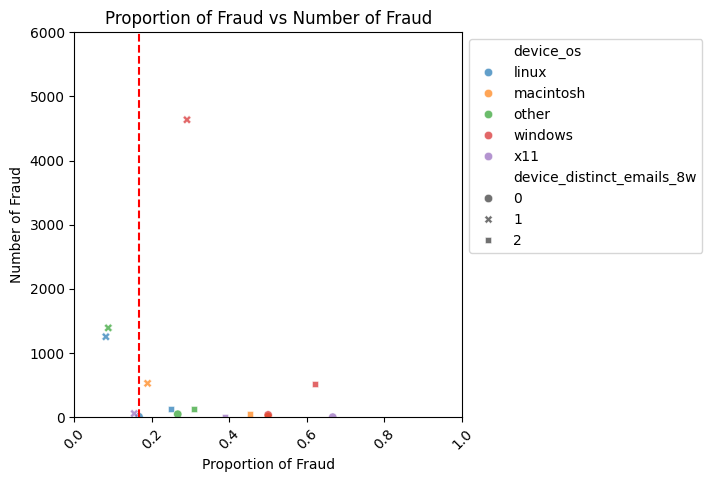

In [24]:
# plot a scatter plot, x-axis: proportion of fraud, y-axis: number of fraud
# plot a vertical line at x = 1/6, make title, x-axis label, y-axis label, and legend, x-axis tilt by 45 degrees
# color code by device_os and device_distinct_emails_8w, for example, device_os = 'windows' and device_distinct_emails_8w = 0 is red, etc..
# axes must start from 0
plt.figure(figsize=(5, 5))
sns.scatterplot(data=device_activity_df.groupby(['device_os', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index(), x='proportion_of_fraud_in_group', y='num_fraud', hue='device_os', style='device_distinct_emails_8w', alpha=0.7)
plt.axvline(x=1/6, color='r', linestyle='--')
plt.title('Proportion of Fraud vs Number of Fraud')
plt.xlabel('Proportion of Fraud')
plt.ylabel('Number of Fraud')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(0, 1)
plt.ylim(0, 6000)


In [27]:
# split device_activity_df into 5 groups by these conditions
group01 = device_activity_df[(device_activity_df['device_os'] == 'windows') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group02 = device_activity_df[(device_activity_df['device_os'] == 'macintosh') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group03 = device_activity_df[(device_activity_df['device_os'] == 'x11') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group04 = device_activity_df[(device_activity_df['device_os'] == 'other') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
# group05 will be all the groups except those in group01, group02, group03, group04
group05 = device_activity_df[~device_activity_df.index.isin(group01.index) & ~device_activity_df.index.isin(group02.index) & ~device_activity_df.index.isin(group03.index) & ~device_activity_df.index.isin(group04.index)]

# combine into 1 dataframe, add label to that dataframe, label each group 'A', 'B', 'C', 'D', 'E', all in new column 'FE_01'
group01['FE_01'] = 'A'; group02['FE_01'] = 'B'; group03['FE_01'] = 'C'; group04['FE_01'] = 'D'; group05['FE_01'] = 'E'
device_activity_df = pd.concat([group01, group02, group03, group04, group05])

# change 'FE_01' to category
device_activity_df['FE_01'] = device_activity_df['FE_01'].astype('category')

# assign probability of fraud to each group
FE_01_prob_mapping = {"A": 0.6047,
                      "B": 0.4529,
                      "C": 0.3846,
                      "D": 0.2978,
                      "E": 0.1564}

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_01_device_os_emails_prob'] = device_activity_df['FE_01'].map(FE_01_prob_mapping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 9)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_74565/3270933267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_01'] = 'A'; group02['FE_01'] = 'B'; group03['FE_01'] = 'C'; group04['FE_01'] = 'D'; group05['FE_01'] = 'E'


,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob
3,0,1.507028,windows,1,2,INTERNET,0,A,0.6047
19,1,2.909931,windows,0,2,INTERNET,0,A,0.6047
105,0,19.697471,windows,0,2,INTERNET,0,A,0.6047
128,0,4.508612,windows,0,0,INTERNET,0,A,0.6047
151,1,30.256072,windows,0,2,INTERNET,0,A,0.6047


## Feature 2

* Group 'keep_alive_session' and 'device_distinct_emails', assign relevant probabilities

In [ ]:
# feature02: keep alive session is 0 and device_distinct_emails_8w is 0 or 2
device_activity_df.groupby(['keep_alive_session', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index()

In [ ]:
# plot a scatter plot, x-axis: proportion of fraud, y-axis: number of fraud
# plot a vertical line at x = 1/6, make title, x-axis label, y-axis label, and legend, x-axis tilt by 45 degrees
# color code by device_os and device_distinct_emails_8w, for example, device_os = 'windows' and device_distinct_emails_8w = 0 is red, etc..
# axes must start from 0
plt.figure(figsize=(5, 5))
sns.scatterplot(data=device_activity_df.groupby(['keep_alive_session', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index(), x='proportion_of_fraud_in_group', y='num_fraud', hue='device_distinct_emails_8w', style='keep_alive_session', alpha=0.7)
plt.axvline(x=1/6, color='r', linestyle='--')
plt.title('Proportion of Fraud vs Number of Fraud')
plt.xlabel('Proportion of Fraud')
plt.ylabel('Number of Fraud')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(0, 1)
plt.ylim(0, 4000)


In [ ]:
# divide into 6 groups, one for each unique permutation of keep_alive_session and device_distinct_emails_8w
group01 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 0)]
group02 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 1)]
group03 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 2)]
group04 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 0)]
group05 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 1)]
group06 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 2)]

# label each group from "A" to "F"
group01['FE_02'] = "A"; group02['FE_02'] = "B"; group03['FE_02'] = "C"; group04['FE_02'] = "D"; group05['FE_02'] = "E"; group06['FE_02'] = "F"

# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04, group05, group06])

# change 'FE_02' to category
device_activity_df['FE_02'] = device_activity_df['FE_02'].astype('category')

# generate mapping
FE_02_prob_mappping = {"A": 0.3520,
                       "B": 0.2230,
                       "C": 0.4732,
                       "D": 0.1591,
                       "E": 0.1016,
                       "F": 0.3131
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_02_keep_alive_device_emails_prob'] = device_activity_df['FE_02'].map(FE_02_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

## Feature 3

* Group 'foreign_request' and 'source', assign relevant probabilites

In [ ]:
# feature03: foreign request is 1 and source == internet
device_activity_df.groupby(['source', 'foreign_request']).apply(getFraudInfo).reset_index()

In [ ]:
# divide into 4 groups, one for each unique permutation of foreign_request and source
group01 = device_activity_df[(device_activity_df['source'] == "INTERNET") & (device_activity_df['foreign_request'] == 0)]
group02 = device_activity_df[(device_activity_df['source'] == "INTERNET") & (device_activity_df['foreign_request'] == 1)]
group04 = device_activity_df[(device_activity_df['source'] == "TELEAPP") & (device_activity_df['foreign_request'] == 0)]
group03 = device_activity_df[(device_activity_df['source'] == "TELEAPP") & (device_activity_df['foreign_request'] == 1)]

# label each group from "A" to "D", label_name = "FE_03"
group01['FE_03'] = "A"; group02['FE_03'] = "B"; group03['FE_03'] = "C"; group04['FE_03'] = "D"


# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04])

# change 'FE_02' to category
device_activity_df['FE_03'] = device_activity_df['FE_03'].astype('category')

# generate mapping
FE_03_prob_mappping = {"A": 0.1627,
                       "B": 0.2782,
                       "C": 0.2448,
                       "D": 0.5000
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_03_source_foreign_request_prob'] = device_activity_df['FE_03'].map(FE_02_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

## Feature 4

* Group by source and device os

In [ ]:
# feature04: foreign request is 1 and device_os == windows
device_activity_df.groupby(['device_os', 'foreign_request']).apply(getFraudInfo).reset_index()

In [ ]:
# plot a scatter plot, x-axis: proportion of fraud, y-axis: number of fraud
# plot a vertical line at x = 1/6, make title, x-axis label, y-axis label, and legend, x-axis tilt by 45 degrees
# color code by device_os and device_distinct_emails_8w, for example, device_os = 'windows' and device_distinct_emails_8w = 0 is red, etc..
# axes must start from 0
plt.figure(figsize=(5, 5))
sns.scatterplot(data=device_activity_df.groupby(['foreign_request', 'device_os']).apply(getFraudInfo).reset_index(), x='proportion_of_fraud_in_group', y='num_fraud', hue='device_os', style='foreign_request', alpha=0.7)
plt.axvline(x=1/6, color='r', linestyle='--')
plt.title('Proportion of Fraud vs Number of Fraud')
plt.xlabel('Proportion of Fraud')
plt.ylabel('Number of Fraud')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(0, 1)


In [ ]:
# group into 4 groups
# divide into 4 groups, one for each unique permutation of foreign_request and source
group01 = device_activity_df[(device_activity_df['device_os'] == "windows") & (device_activity_df['foreign_request'] == 0)]
group02 = device_activity_df[(device_activity_df['device_os'] == "windows") & (device_activity_df['foreign_request'] == 1)]
group03 = device_activity_df[(device_activity_df['device_os'] == "macintosh") & (device_activity_df['foreign_request'] == 0)]
group04 = device_activity_df[~device_activity_df.index.isin(group01.index) & ~device_activity_df.index.isin(group02.index) & ~device_activity_df.index.isin(group03.index)]

# label each group from "A" to "D", label_name = "FE_03"
group01['FE_04'] = "A"; group02['FE_04'] = "B"; group03['FE_04'] = "C"; group04['FE_04'] = "D"


# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04])

# change 'FE_04' to category
device_activity_df['FE_04'] = device_activity_df['FE_04'].astype('category')

device_activity_df.groupby(['FE_04']).apply(getFraudInfo).reset_index()

In [ ]:
# generate mapping
FE_04_prob_mappping = {"A": 0.3027,
                       "B": 0.4605,
                       "C": 0.2010,
                       "D": 0.0916
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_04_device_os_foreign_request'] = device_activity_df['FE_04'].map(FE_04_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

## Feature 5

* Assign probabilities to device_os instead of categories

In [ ]:
# feature05: foreign request is 1 and device_os == windows
device_activity_df.groupby(['device_os']).apply(getFraudInfo).reset_index()

In [ ]:
# assign mapp probability
# generate mapping
FE_05_prob_mappping = {"windows": 0.3083,
                       "macintosh": 0.2041,
                       "linux": 0.0001,
                       "other": 0.0001,
                       "x11": 0.0001
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_05_device_os'] = device_activity_df['device_os'].map(FE_05_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

# FE steps only

In [ ]:
# read data
